In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
header_list = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.csv',  names=header_list, na_values='?')
df = df.sample(frac=1)

In [5]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
222,recurrence-events,60-69,ge40,25-29,0-2,no,3,left,right_low,yes
50,no-recurrence-events,50-59,lt40,15-19,0-2,no,2,left,left_low,no
76,no-recurrence-events,50-59,ge40,10-14,0-2,no,2,left,left_low,no
89,no-recurrence-events,40-49,premeno,40-44,0-2,no,1,right,left_up,no
242,recurrence-events,50-59,ge40,25-29,6-8,no,3,left,left_low,yes


In [6]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, SpectralClustering, KMeans, DBSCAN
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from kmodes.kmodes import KModes

In [7]:
df.shape

(286, 10)

In [10]:
df = df.dropna()

In [14]:
categorical_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'breast', 'breast-quad', 'irradiat']
numeric_features = ['deg-malig']

In [15]:
X, y = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 
         'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']], df['Class']

y = LabelEncoder().fit_transform(y)

K Means

In [105]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [108]:
pipe = Pipeline(steps=[ 
    ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('clustering', kmeans)])

In [111]:
y_pred = pipe.fit_predict(X)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [113]:
labels = pipe['clustering'].labels_
labels

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [117]:
pipe2 = Pipeline(steps=[ 
    ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
))])
XX = pipe2.fit_transform(X)

In [126]:
print(silhouette_score(XX, labels))
print(davies_bouldin_score(XX.toarray(), labels))
print(calinski_harabasz_score(XX.toarray(), labels))

0.14968921932512427
2.327450393615745
51.12087377647167


In [142]:
?DBSCAN

In [20]:
clustering_models = [KMeans(), AffinityPropagation(), Birch(), SpectralClustering(), AgglomerativeClustering ]

In [22]:
for i in clustering_models:
    print("\n")
    print(i)
    model = Pipeline(steps=[ 
        ('prepocessor', ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ]
    )), ('clustering', i)])

    model.fit_predict(X)

    labels = model['clustering'].labels_


    pipe2 = Pipeline(steps=[ 
        ('prepocessor', ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ]
    ))])
    XX = pipe2.fit_transform(X)

    print('Silhoutter Score', silhouette_score(XX, labels))
    print('Davies Boildin Score', davies_bouldin_score(XX.toarray(), labels))
    print('Calinski Harabasz', calinski_harabasz_score(XX.toarray(), labels))



KMeans()
Silhoutter Score 0.10942418988796714
Davies Boildin Score 2.162353596165966
Calinski Harabasz 24.933094760725748


AffinityPropagation()
Silhoutter Score 0.11736575409953805
Davies Boildin Score 1.740206585987632
Calinski Harabasz 10.987595576654929


Birch()
Silhoutter Score 0.1084129396028881
Davies Boildin Score 2.396699034853752
Calinski Harabasz 33.7080924317619


SpectralClustering()
Silhoutter Score 0.049315880301659815
Davies Boildin Score 1.882598192337405
Calinski Harabasz 16.363175374646904


In [17]:
kmodes = KModes(n_clusters=2)

clusters = kmodes.fit_predict(X)

# Print the cluster centroids
print(kmodes.cluster_centroids_)

[['40-49' 'premeno' '25-29' '0-2' 'no' '2' 'left' 'left_low' 'no']
 ['60-69' 'ge40' '30-34' '0-2' 'no' '3' 'right' 'left_up' 'no']]


Distance-based clustering algorithms can handle categorical data
You only have to choose an appropriate distance function such as Gower's distance that combines the attributes as desired into a single distance. Then you can run Hierarchical Clustering, DBSCAN, OPTICS, and many more.

Sounds good, but it is only part of the story - your choice of distance function has a massive impact on your results.

Results will probably never be "sound" with categorical data
Nevertheless, clustering may end up never to work well on such data. Consider the description from Wikipedia:

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

So for clustering, you need a qualitative similarity, so the algorithm knows when objects are "more similar" than others.

That is why many algorithms use some form of distance: closer = more similar. It is a very intuitive way of qualifying similarity.

With continuous variables, it is challenging enough to properly normalize the data. Most people either ignore data normalization, normalize to [0;1] or standardize to μ=0, σ=1. With high-dimensional data, people sometimes also do PCA (but more often than not use it in an absurd way, witjout considering the effect this has on their data). The good thing with continuous variables is that they can be quite "forgiving". If your scaling/weighting is a little off, the outcomes may still be good. Similarly, if there is a small error in your data, it only has a small effect on your distance.

Unfortunately, this does not carry over to discrete, likert, or categorical variables. There are plenty of approaches used, such as one-hot encoding (every category becomes its own attribute), binary encodings (first category is 0,0; second is 0,1, third is 1,0, fourth is 1,1) that effectively map your data in a Rd space, where you could use k-means and all that. But these approaches are highly fragile. They tend to work if you have only binary categories, unless they vary too much in frequency. But the problem is that you have low discriminiability. You may have 0 objects at distance 0 (these would be duplicates), then nothing for a while, and then hundreds of objects at distance 2. But nothing inbetween. So whichever algorithm you use, it will have to merge all these objects at once, because they have the exact same similarity. In the worst case, your data might go from duplicates-only to everything-is-one-cluster because of this. Now if you would put different weight on every attribute this will be slightly better (you will still habe lots of object pairs that differ only in this one attribute, and thus have the same distance) but how do you choose the weights of attributes? There does not appear a statistically sound unsupervised way.

So in conclusion, I believe that categorical data does not cluster in the way clustering is commonly defined because the discrete nature yields too little discrimination/ranking of similarities. It may have frequent patterns as detected e.g. by Apriori, but that is a very different definition. And how to combine these two is not obvious. So for categorical data, I recommend frequent patterns. These make much more sense than "clusters".

In [25]:
!pip install gower

In [23]:
import gower

In [24]:
distance_matrix = gower.gower_matrix(X)
distance_matrix

array([[0.        , 0.6111111 , 0.5       , ..., 0.5555556 , 0.7777778 ,
        0.5555556 ],
       [0.6111111 , 0.        , 0.22222222, ..., 0.3888889 , 0.5       ,
        0.2777778 ],
       [0.5       , 0.22222222, 0.        , ..., 0.2777778 , 0.3888889 ,
        0.2777778 ],
       ...,
       [0.5555556 , 0.3888889 , 0.2777778 , ..., 0.        , 0.6666667 ,
        0.22222222],
       [0.7777778 , 0.5       , 0.3888889 , ..., 0.6666667 , 0.        ,
        0.44444445],
       [0.5555556 , 0.2777778 , 0.2777778 , ..., 0.22222222, 0.44444445,
        0.        ]], dtype=float32)

In [48]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(min_samples=2)

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df["cluster"] = dbscan_cluster.labels_

In [49]:
df['cluster'].value_counts()

-1     238
 11      3
 0       2
 17      2
 16      2
 15      2
 14      2
 13      2
 12      2
 10      2
 9       2
 8       2
 7       2
 6       2
 5       2
 4       2
 3       2
 2       2
 1       2
 18      2
Name: cluster, dtype: int64

In [176]:
df['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [177]:
df['N_Class'] = LabelEncoder().fit_transform(df['Class'])
df['N_Class'].value_counts()

0    201
1     85
Name: N_Class, dtype: int64

In [178]:
accuracy_score( df['N_Class'], df['cluster'] )

0.7202797202797203

In [91]:
clustering_models = [KMeans(n_clusters=2), Birch(n_clusters=2), SpectralClustering(n_clusters=2) ]


for i in clustering_models:
    print("\n")
    print(i)
    model = i

    model.fit_predict(distance_matrix)

    labels = model.labels_

    XX = distance_matrix

    print('Silhoutte Score', round(silhouette_score(XX, labels), 4) ) 
    print('Davies Boildin Score', round(davies_bouldin_score(XX, labels), 4) )
    print('Calinski Harabasz', round(calinski_harabasz_score(XX, labels), 4) )



KMeans(n_clusters=2)
Silhoutte Score 0.335
Davies Boildin Score 1.2941
Calinski Harabasz 119.0927


Birch(n_clusters=2)
Silhoutte Score 0.3039
Davies Boildin Score 1.438
Calinski Harabasz 111.6199


SpectralClustering(n_clusters=2)
Silhoutte Score 0.2875
Davies Boildin Score 1.224
Calinski Harabasz 59.0401


C:\Users\elsha\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:589: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


## KModes using Elbow

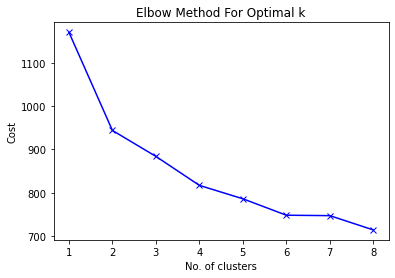

In [50]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

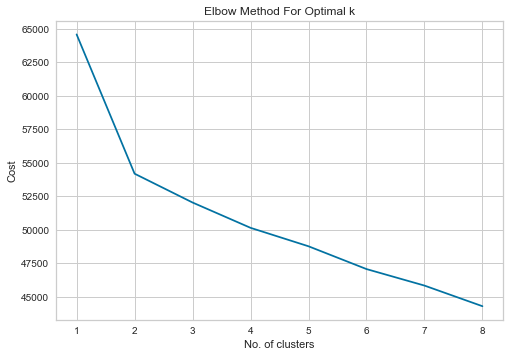

In [63]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(distance_matrix)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

plt.savefig('figures/elbow_kmodes.png')

plt.show()

In [ ]:
pipe = Pipeline(steps=[ 
    ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('clustering', kmeans)])


# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    pipe.fit_predict(distance_matrix)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
!pip install yellowbrick

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\elsha\\anaconda3\\Lib\\site-packages\\numpy\\~ore\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



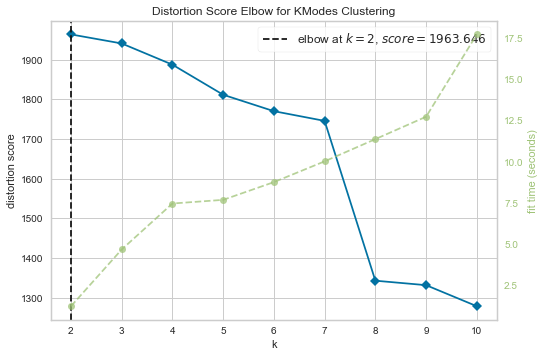

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KModes(), k=10)
model.fit(distance_matrix)
model.show()

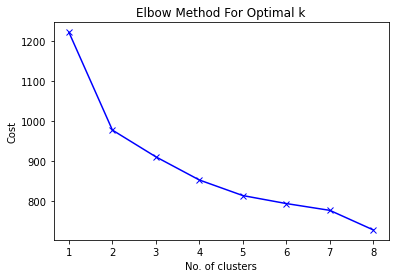

In [201]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()